In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

# Data Loading

In [3]:
Train = pd.read_csv('Data/Train.csv')
Test = pd.read_csv('Data/Test.csv')
Submission = pd.read_csv('Data/SampleSubmission.csv')

# EDA

/home/joragasy/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sentiment Class')

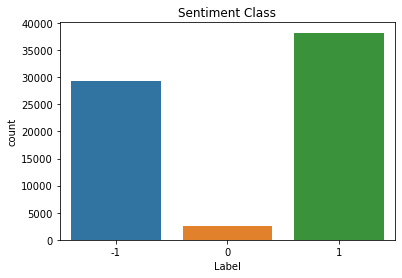

In [4]:
sns.countplot(Train.label)
plt.xlabel('Label')
plt.title('Sentiment Class')

# Features Engeniring

# Step 1:  Define Problem
## Train a model to predict  sentiment based on arabizi text.

In [5]:
le = LabelEncoder()

In [6]:
NUM_WORDS=8000
SEQ_LEN=128
EMBEDDING_SIZE=128
BATCH_SIZE=32
EPOCHS=5
THRESHOLD=0.5

In [7]:
from sklearn.preprocessing import LabelBinarizer
X = Train.text
#Y = to_categorical(Train['label'], num_classes=3)
Lb = LabelBinarizer()
Lb.fit(Train['label'])
Y = Lb.transform(Train['label'])
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [63]:
Y

array([2])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.1, random_state=1000)

In [9]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [12]:
sequences_matrix[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  41,  16, 197,   9,
        11, 182,   4, 260, 461,   1,   4], dtype=int32)

In [16]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,200,input_length=max_len)(inputs)
    layer = LSTM(128)(layer)
    layer = Dense(64,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(3,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [17]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 200)          200000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               168448    
_________________________________________________________________
FC1 (Dense)                  (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
out_layer (Dense)            (None, 3)                 195 

In [ ]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

In [ ]:
#Test 
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

accr = model.evaluate(test_sequences_matrix,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

In [51]:
Xsub = Test['text']
#Ysub = to_categorical(Test['label'], num_classes=3)

sub_sequences = tok.texts_to_sequences(Xsub)
sub_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

prediction = model.predict(sub_sequences_matrix)

In [58]:
prediction = model.predict(sub_sequences_matrix)

array([[2.9315932e-11, 2.7524276e-11, 1.0000000e+00],
       [2.8062219e-11, 2.6525178e-11, 1.0000000e+00],
       [3.0395322e-11, 2.8528284e-11, 1.0000000e+00],
       ...,
       [2.9587534e-11, 2.7799369e-11, 1.0000000e+00],
       [2.8483266e-11, 2.6827767e-11, 1.0000000e+00],
       [2.8517622e-11, 2.6852135e-11, 1.0000000e+00]], dtype=float32)

# Step 2:
## Convert text to numeric data.

In [23]:
#create tokenizer for our data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=NUM_WORDS, oov_token='<UNK>')
tokenizer.fit_on_texts(Train['text'])

#convert text data to numerical indexes
train_seqs=tokenizer.texts_to_sequences(Train['text'])
test_seqs=tokenizer.texts_to_sequences(Train['text'])

#pad data up to SEQ_LEN (note that we truncate if there are more than SEQ_LEN tokens)
train_seqs=tf.keras.preprocessing.sequence.pad_sequences(train_seqs, maxlen=SEQ_LEN, padding="post")
test_seqs=tf.keras.preprocessing.sequence.pad_sequences(test_seqs, maxlen=SEQ_LEN, padding="post")

In [7]:
Test

,ID,text
0,2DDHQW9,barcha aaindou fiha hak w barcha teflim kadhalik
1,5HY6UEY,ye gernabou ye 9a7ba
2,ATNVUJX,saber w barra rabbi m3ak 5ouya
3,Q9XYVOQ,cha3ébbb ta7aaaaannnnnnnnnnn tfouuhh
4,TOAHLRH,rabi y5alihoulek w yfar7ek bih w inchallah itc...
...,...,...
29995,NHXTL3R,me ihebekch raw
29996,U1YWB2O,nchallah rabi m3ak w iwaf9ek mais just 7abit n...
29997,O3KYLM0,slim rabi m3ak w e5edem w 5alli l7ossed lemnay...
29998,W4C38TY,bara 5alis rouhik yizi mitbal3it jam3iya hlaki...


## Perform Bag of word 

In [9]:
# Example with Count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
vectorizer = CountVectorizer(lowercase=True)

# tokenize and build vocab
vectorizer.fit(x_train)

X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)
X_submission = vectorizer.transform(Test['text'])

# Step 3:  Model Selection and Design

In [21]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100,verbose=True)
model.fit(sequences_matrix,Y_train)

/home/joragasy/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


ValueError: y should be a 1d array, got an array of shape (63000, 3) instead.

In [19]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=5)
model1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [24]:
score = model1.score(X_test, y_test)
score 

0.7201428571428572

In [26]:
score = model.score(X_train, y_train)
score 

0.9156507936507936

In [27]:
score = model.score(X_test, y_test)
score 

0.7822857142857143

In [13]:
X_submission

<30000x138738 sparse matrix of type '<class 'numpy.int64'>'
	with 225475 stored elements in Compressed Sparse Row format>

In [17]:
prediction = model.predict(X_submission)

In [18]:
prediction

array([ 1, -1,  1, ...,  1, -1,  1])

In [19]:
for i in range(len(prediction)):
    Submission.loc[i,'label'] = prediction[i]
Submission

,ID,label
0,2DDHQW9,1
1,5HY6UEY,-1
2,ATNVUJX,1
3,Q9XYVOQ,1
4,TOAHLRH,1
...,...,...
29995,NHXTL3R,-1
29996,U1YWB2O,1
29997,O3KYLM0,1
29998,W4C38TY,-1


In [20]:
Submission = Submission.rename(columns={'label':'Label'})
Submission

,ID,Label
0,2DDHQW9,1
1,5HY6UEY,-1
2,ATNVUJX,1
3,Q9XYVOQ,1
4,TOAHLRH,1
...,...,...
29995,NHXTL3R,-1
29996,U1YWB2O,1
29997,O3KYLM0,1
29998,W4C38TY,-1


In [22]:
Submission.to_csv('submission2.csv')

In [123]:
sub.loc[26515,'ID'] = '0654460'

In [28]:
X_train[0]

<1x138738 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [47]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features
model = Sequential()
model.add(layers.Dense(100, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras.backend import clear_session

# Step 4:
## Train Model

In [48]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max')
callbacks=[es]
#history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test,y_test), callbacks=callbacks)
history = model.fit(X_train, y_train,
                         epochs=10,
                         verbose=True,
                         validation_data=(X_test, y_test),
                         batch_size=100)

Epoch 1/10


InvalidArgumentError:  TypeError: 'SparseTensor' object is not subscriptable
Traceback (most recent call last):

  File "/home/joragasy/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 241, in __call__
    return func(device, token, args)

  File "/home/joragasy/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 130, in __call__
    ret = self._func(*args)

  File "/home/joragasy/anaconda3/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 309, in wrapper
    return func(*args, **kwargs)

  File "/home/joragasy/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/data_adapter.py", line 513, in py_method
    return [slice_array(inp) for inp in flat_inputs]

  File "/home/joragasy/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/data_adapter.py", line 513, in <listcomp>
    return [slice_array(inp) for inp in flat_inputs]

  File "/home/joragasy/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/data_adapter.py", line 511, in slice_array
    return training_utils.slice_arrays(data, ind.numpy(),

  File "/home/joragasy/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training_utils.py", line 391, in slice_arrays
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

  File "/home/joragasy/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training_utils.py", line 391, in <listcomp>
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

  File "/home/joragasy/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training_utils.py", line 391, in <listcomp>
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

TypeError: 'SparseTensor' object is not subscriptable


	 [[{{node EagerPyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_2139]

Function call stack:
train_function


In [21]:
model.evaluate(test_seqs, Train['label'].values)[1]

2188/2188 [==============================] - 10s 5ms/step - loss: 0.0664 - accuracy: 0.0632


0.06318571418523788